In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import pycountry
%matplotlib inline
import string
from spellchecker import SpellChecker
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv('resume_with_job_description.csv')
df

,id,content,jobDescription
0,clg43d9an007gx02ug1i694j6,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Job Posting:\nDo you have a passion for helpin...
1,clg3itetj006jx92tdkcrw195,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Tasks:\n\nCreation of concepts for dashboard i...
2,clg3iy1sd007rx32utnuhnrgy,"{""awards"": {""awards"": [{""name"": ""Dean's List"",...",Responsibilities:\n\nWork closely with product...
3,clg5j15lz00k3x02uaau7g9z0,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",What is Talentport :\n\nTalentport connects SE...
4,clg43pte600ddya2umakfw3c3,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Hyperproof is hiring a Product Manager with a ...
...,...,...,...
11971,cleexyzag006ayg2vhr087als,"{""awards"": {""awards"": []}, ""header"": {""role"": ...","Assist with content ideation and creation, inc..."
11972,cleec90b0005nyf2tlos9qc95,"{""awards"": {""awards"": [{""name"": ""Honor Roll "",...",This person must excel in a fast-paced environ...
11973,cleey05qa000exd2up87uehkz,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",In collaboration with the Senior Communication...
11974,cle0edrgo00a5wz2utru0nt5u,"{""awards"": {""awards"": [{""name"": ""Honor Roll "",...",About the job\nYou’ve got 52 weeks a year to f...


In [3]:
# The first Normalization which is to normalize content column in the big dataset
df['json_dict'] = df['content'].apply(lambda x: json.loads(x))
content = pd.json_normalize(df['json_dict'])
df = df.drop('content', axis=1)
df = df.drop('json_dict', axis=1)
df = pd.concat([df, content], axis=1)

In [4]:
education=pd.json_normalize(df.loc[:,'education.education'])
education.columns = [str(a) for a in education.columns]

In [5]:
#Normalize the education.education column
education=pd.json_normalize(df.loc[:,'education.education'])
education.columns = [str(a) for a in education.columns]
for col in education.columns:
    for i in range(0, len(education)):
        if education[col][i] == None:
            education[col][i] = None
        elif education[col][i]['school'] != '':
            education[col][i] = education[col][i]
        else:
            education[col][i] = None

education.dropna(axis=1, how='all',inplace=True)

In [6]:
education['no_edu'] = np.nan
for row in range(len(education)):
    education['no_edu'][row]= len(education.columns) - education.loc[row].isna().sum().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_8560\418383083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education['no_edu'][row]= len(education.columns) - education.loc[row].isna().sum().sum()
C:\Users\User\AppData\Local\Temp\ipykernel_8560\418383083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education['no_edu'][row]= len(education.columns) - education.loc[row].isna().sum().sum()
C:\Users\User\AppData\Local\Temp\ipykernel_8560\418383083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [7]:
#Skill
skill = pd.json_normalize(df.loc[:,'skills.skills'])
skill.columns = [str(a) for a in skill.columns]
for col in skill.columns:
    for i in range(0, len(skill)):
        if skill[col][i] == None:
            skill[col][i] = None
        elif skill[col][i]['sectionName'] != '':
            skill[col][i] = skill[col][i]
        else:
            skill[col][i] = None

skill.dropna(axis=1, how='all',inplace=True)

In [8]:
skill['no_skill'] = np.nan
for row in range(len(skill)):
    skill['no_skill'][row]= int(len(skill.columns) - skill.loc[row].isna().sum().sum())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
experience = pd.json_normalize(df.loc[:,'experience.experience'])
experience.columns = [str(a) for a in experience.columns]
for col in experience.columns:
    for i in range(0, len(experience)):
        if experience[col][i] == None:
            experience[col][i] = None
        elif experience[col][i]['company'] != '':
            experience[col][i] = experience[col][i]
        else:
            experience[col][i] = None

experience.dropna(axis=1, how='all',inplace=True)

In [10]:
experience['no_experience'] = np.nan
for row in range(len(experience)):
    experience['no_experience'][row] = len(experience.columns) - experience.loc[row].isna().sum().sum()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# Put the data frame into the dataframe
final_content = content
final_content = pd.concat([final_content, education['no_edu'], skill['no_skill'], experience['no_experience']], axis=1)

In [12]:
def spell_check(x):
    blob = TextBlob(x)
    corrected_text = blob.correct()
    corrected_text = ''.join(corrected_text)
    return corrected_text.strip()

final_content['country'] = final_content['header.contact.country'].apply(lambda x : spell_check(x))

In [13]:
def findCountry (country_name):
    try:
        return pycountry.countries.get(name=country_name).name
    except:
        return (None)
final_content['country_cleaned'] = final_content['country'].apply(lambda x: findCountry(x))

In [14]:
# Define a formula to count the number of item
def count_len(x):
    length = len(x)
    return length

In [15]:
final_content['no_of_cert'] = df['certifications.certifications'].apply(lambda x: count_len(x))
final_content['no_of_projects']= df['projects.projects'].apply(lambda x: count_len(x))

In [16]:
spell2 = SpellChecker()
def no_spellingmistake(row):
    word_list = []
    for x in row:
        withoutpunctuation =str(x).translate(str.maketrans('', '', string.punctuation))
        word_list += str(withoutpunctuation).split()
    misspelled = spell2.unknown(word_list)
    return len(misspelled)
final_content['spellingmistake'] = content.apply(lambda row: no_spellingmistake(row), axis=1)

In [17]:
word_count_df = final_content[['keywords', 'awards.awards', 'header.role', 
                           'skills.skills', 'summary.text', 'projects.projects', 
                           'education.education', 'volunteer.volunteer', 'experience.experience', 
                           'references.references', 'publications.publications', 'certifications.certifications', 
                           'accomplishments.text']]
def word_calculate(row):
    word_list = []
    for x in row:
        withoutpunctuation =str(x).translate(str.maketrans('', '', string.punctuation))
        word_list += str(withoutpunctuation).split()
    return len(word_list)
final_content['word_count'] = word_count_df.apply(lambda row: word_calculate(row), axis=1)

In [18]:
def skill_list(row):
    skill_list = []
    for i in row:
        if i == None:
            pass
        else:
            skill_list += str(i['section']).split(',')
    new = []
    for i in skill_list:
        if 'and' in i:
            new.append(i.replace('and', '').strip())
        else:
            new.append(i)
    return new

In [19]:
skill1 = skill.drop('no_skill', axis=1)
final_content['skill_list'] = skill1.apply(lambda row: skill_list(row), axis=1)

In [20]:
def company(row):
    company = []
    for i in row:
        if i == None:
            pass
        else:
            company.append(i['company'].strip())
    return company

In [21]:
experience1 = experience.drop('no_experience', axis=1)
experience1
final_content['company_list'] = experience1.apply(lambda row: company(row), axis=1)

In [22]:
state = pd.unique(final_content['header.contact.state'])
def location(row):
    all_location = []
    for i in row:
        if i ==None:
            pass
        else:
            locations=i['location'].split(',')
            all_location.append(locations[0])
    return all_location

In [23]:
experience1 = experience.drop('no_experience', axis=1)
experience1
final_content['location'] = experience1.apply(lambda row: location(row), axis=1)

# Preparation for Resume Quality

#### More Data Cleaning

In [36]:
#Define function parse_list() to parse keys and items across dictionaries in the list
def parse_list(x):
    if isinstance(x, list) and x:  # test whether list contains something
        aggregated_keys = {}   # initialize an empty dictionary
        for item in x:
            if isinstance(item, dict):   # test whether item is a dictionary
                for key, value in item.items():
                    if key in aggregated_keys:  # if key already exists in dictionary
                        aggregated_keys[key].append(value)  # append the new value to the existing array at that key
                    else: # if key does not exist in dictionary
                        aggregated_keys[key] = [value]  # add the key-value pair to the dictionary
        return pd.Series(aggregated_keys)    # convert the dictionary to a pandas Series
    else:
        return pd.Series({})  # if x is not a list, return an empty Series

In [39]:
#Rename
final_content.rename(columns={'awards.awards':'awards', 'skills.skills': 'skills', 'projects.projects':'project','volunteer.volunteer':'volunteer','experience.experience':'experience',
                              'references.references':'references','publications.publications':'publications','certifications.certifications':'certifications',
                              'education.education':'education'}, inplace=True)

#### Count bullet points

In [40]:
#Generated new columns with collection of items under the same key to and dropped the original columns by looping over columns with lists of dictionaries.
for col in ['awards', 'skills', 'project', 'education', 'volunteer', 'experience', 'references', 'publications', 'certifications']:   # Select Columns with lists of dictionaries
    parsed_df = final_content[col].apply(parse_list)   # apply the parse_list function to the column
    parsed_df.columns = [f'{col}_{x}' for x in parsed_df.columns]  # rename the columns
    final_content = pd.concat([final_content, parsed_df], axis=1)  # concatenate the parsed columns to the original data frame

In [46]:
# Assuming you have a DataFrame named 'df' with the relevant columns
columns_to_check = ["volunteer_description", "accomplishments.text", "project_description", "experience_description", "publications_details"]

# Define a function to count bullet points in a given text
def count_bullet_points(text):
    if isinstance(text, str):
        return text.count('-')  # Change the bullet point character as needed
    else:
        return 0

# Apply the function to each row and assign the counts to a new column
final_content['bullet_point_count'] = final_content[columns_to_check].apply(lambda row: sum(count_bullet_points(row[col]) for col in columns_to_check), axis=1)

Index(['keywords', 'suggestedSkills', 'awards', 'header.role',
       'header.contact.city', 'header.contact.state', 'header.contact.country',
       'skills', 'summary.text', 'summary.visible',
       ...
       'publications_link', 'publications_name', 'publications_details',
       'publications_visible', 'publications_publisher', 'certifications_name',
       'certifications_issuer', 'certifications_visible',
       'certifications_dateReceived', 'bullet_point_count'],
      dtype='object', length=148)

#### Total Action Verb

In [48]:
import pandas as pd
import re

# Define a list of 201 action verbs
words = '''Administered Assigned Authorized Coached Coordinated Developed Directed Empowered Enabled Enforced Established Facilitated Guided
 Headed Implemented Initiated Operated Orchestrated Organized Overhauled Oversaw Presided Spearheaded Streamlined Supervised Adapted Authored
 Composed Conceived Conceptualized Curated Designed Directed Drafted Edited Illustrated Performed Photographed Proofread Published Revised
 Storyboarded Translated Wrote Accomplished Actualized Administered Completed Developed Enforced Executed Fulfilled Implemented Operated
 Organized Performed Prepared Realized Aided Assisted Coached Co-authored Collaborated Cooperated Coproduced Fostered Helped Joined Married
 Melded Merged Motivated Participated Partnered Persuaded Supported Teamed Trained Addressed Authored Corresponded Critiqued Documented
 Edited Explained Interpreted Instructed Lectured Lobbied Mediated Moderated Performed Persuaded Presented Promoted Proposed Spoke Wrote
 Accomplished Accelerated Achieved Attained Boosted Completed Decreased Delivered Drove Exceeded Expanded Expedited Grew Improved Maximized
 Outperformed Raised Reached Strengthened Surpassed Analyzed Assessed Collected Diagnosed Discovered Evaluated Examined Explored Forecasted
 Gathered Inspected Investigated Mapped Measured Probed Reported Researched Studied Surveyed Tested Adjusted Analyzed Appraised Assessed
 Audited Balanced Budgeted Calculated Converted Estimated Evaluated Forecasted Invested Lowered Measured Netted Projected Qualified Reduced
 Researched Coded Computed Constructed Debugged Deployed Designed Developed Devised Diagnosed Engineered Maintained Modified Networked
 Operated Overhauled Programmed Standardized Tested Updated Upgraded Advised Coached Communicated Encouraged Evaluated Explained Guided
 Individualized Instructed Lectured Motivated Persuaded Set goals Stimulated Taught Tested Tutored Worked Responsible Managed Led Assisted'''
word_list = words.split()

# Convert each element to string
word_list = list(map(str, word_list))

In [49]:
# select columns that have bullet points of descriptions
columns_to_check = ["volunteer_description", "accomplishments.text", "project_description", "experience_description", "publications_details"]
action_verbs = word_list

# Count the occurrences of action verbs in each row
verb_count = final_content[columns_to_check].apply(lambda row: sum(1 for verb in action_verbs if any(re.findall(r'\b{}\b'.format(verb), str(row[column]), re.IGNORECASE) for column in final_content[columns_to_check].columns)), axis=1)

# Put them into a new row
final_content['total_action_verb'] = verb_count

#### Total Pronouns

In [51]:
# Define a list of 34 pronouns
pronouns = ''' I we you he she it they me us you her him it them mine ours yours hers his theirs my our your her his their myself yourself
herself himself itself ourselves yourselves themselves'''
pronoun_list = pronouns.split()

# Convert each element to string
pronoun_list = list(map(str, pronoun_list))

In [52]:
# Count the occurrences of pronouns in each row
pronoun_count = final_content.apply(lambda row: sum(1 for pronoun in pronoun_list if any(re.findall(r'\b{}\b'.format(pronoun), str(row[column]), re.IGNORECASE) for column in final_content.columns)), axis=1)

# Put them into a new row
final_content['pronoun_count'] = pronoun_count

# Industry by User

In [58]:
import openai

jds = df['jobDescription'].to_list()
#openai.api_key = api_key_2

#A function which use Open AI to find the Industry for each user
def classify_job_ad(job_ad_text):
    prompt = f"Please classify this job ad by one single industry:\n{job_ad_text}\nIndustry:"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=10,
        n=1,
        stop=None,
        temperature=0.5,
    )
    industry_labels = response.choices[0].text.strip().split("\n")
    return industry_labels[0]

In [59]:
#Find the industry for each user
#Please don't run it, because you need to pay each time when you use it
#We only run this function once to get the result, and story in a CSV file
'''
industry = []
for jd in jds:
    print(jd)
    job_industry =  classify_job_ad(jd)
    industry.append(job_industry)

industry
'''

'\nindustry = []\nfor jd in jds:\n    print(jd)\n    job_industry =  classify_job_ad(jd)\n    industry.append(job_industry)\n\nindustry\n'

# Resume Quality

In [67]:
top_10_industries = pd.read_csv('top 10 industries.csv')
usefulcolumns = final_content[['no_edu', 'no_skill', 'no_experience', 'country',
                               'country_cleaned', 'no_of_cert', 'no_of_projects',
                               'spellingmistake', 'word_count', 'skill_list',
                               'company_list', 'location', 'bullet_point_count',
                               'total_action_verb', 'pronoun_count']]
usefulcolumns = pd.concat([usefulcolumns, top_10_industries['industry']], axis=1)

In [68]:
def important_section(row):
    if row['education'] == None or row['experience'] == None or row['project'] == None:
        return 'Poor'
    else:
        if row['skills'] == None:
            return 'Good'
        else:
            return 'Excellent'
usefulcolumns['important_section'] = final_content.apply(lambda row: important_section(row), axis=1)

In [69]:
usefulcolumns['word_count'] = usefulcolumns['word_count'].astype('int')
def resume_len(row):
    if 300 < row['word_count'] < 500:
        return 'Excellent'
    elif row['word_count'] < 200 or row['word_count'] > 1000:
        return 'Poor'
    else:
        return 'Good'
usefulcolumns['resume_length'] = usefulcolumns.apply(lambda row: resume_len(row), axis=1)

In [70]:
usefulcolumns['total_action_verb'] = usefulcolumns['total_action_verb'].astype('int')
def action_verb(row):
    if row['total_action_verb'] < 5:
        return 'Poor'
    elif row['total_action_verb'] > 10:
        return 'Excellent'
    else:
        return 'Good'
usefulcolumns['action_verb'] = usefulcolumns.apply(lambda row: action_verb(row), axis=1)

In [71]:
usefulcolumns['pronoun_count'] = usefulcolumns['pronoun_count'].astype('int')
def no_pronoun(row):
    if row['pronoun_count'] <= 0:
        return 'Excellent'
    elif row['pronoun_count'] <= 3:
        return 'Good'
    else:
        return 'Poor'
usefulcolumns['no_use_pronoun'] = usefulcolumns.apply(lambda row: no_pronoun(row), axis=1)

In [72]:
usefulcolumns['bullet_point_count'] = usefulcolumns['bullet_point_count'].astype('int')
def bullet_point(row):
    if row['bullet_point_count'] >= 10:
        return 'Excellent'
    elif row['bullet_point_count'] >= 3:
        return 'Good'
    else:
        return 'Poor'
usefulcolumns['bullet_point'] = usefulcolumns.apply(lambda row: bullet_point(row), axis=1)

In [73]:
usefulcolumns['spellingmistake'] = usefulcolumns['spellingmistake'].astype('int')
def spelling(row):
    if row['spellingmistake'] <= 10:
        return 'Excellent'
    elif row['spellingmistake'] <= 50:
        return 'Good'
    else:
        return 'Poor'
usefulcolumns['spelling'] = usefulcolumns.apply(lambda row: spelling(row), axis=1)

In [74]:
def resume_quality(row):
    quality = [row['important_section'], row['resume_length'], row['action_verb'], row['no_use_pronoun'], row['bullet_point'], row['spelling']]
    if quality.count('Poor') > 2:
        return 'Poor'
    elif quality.count('Poor') > 0:
        return 'Good'
    elif quality.count('Excellent') > 2:
        return 'Excellent'
    else: 
        return 'Good'
usefulcolumns['resume_quality'] = usefulcolumns.apply(lambda row: resume_quality(row), axis=1)

# Make Data Visible

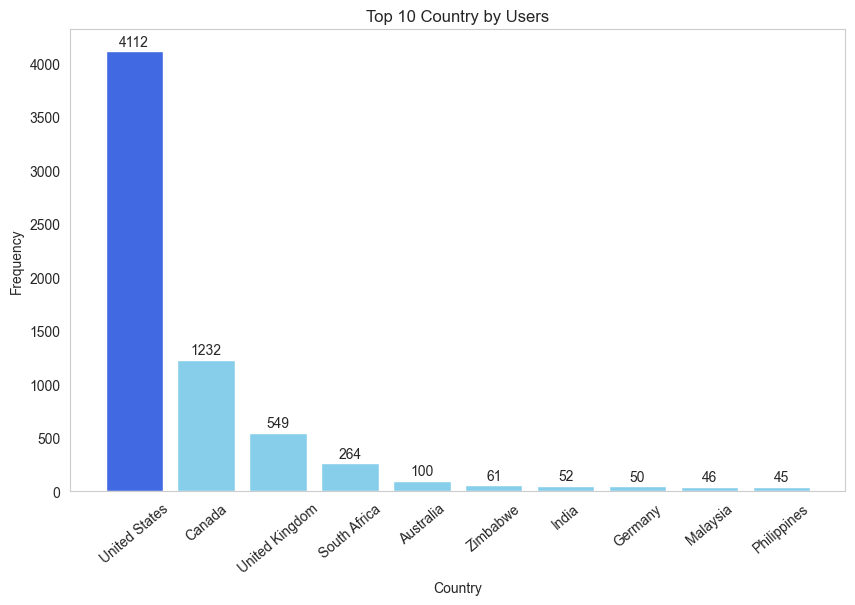

In [92]:
country = usefulcolumns['country_cleaned'].value_counts().reset_index()
country.columns = ['Country', 'Frequency']
top_10_country = country.sort_values(by=['Frequency'], ascending=False)[0:10]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_country['Country'], top_10_country['Frequency'], color=['royalblue' if i < 1 else 'skyblue' for i in range(len(top_10_country))])
ax.set_xlabel('Country')
ax.set_ylabel('Frequency')
plt.setp(ax.get_xticklabels(), rotation=40, ha='center')
ax.set_title('Top 10 Country by Users')
plt.grid(False)
for i, freq in enumerate(top_10_country['Frequency']):
    ax.text(i, freq + 50, str(freq), ha='center')
plt.show()

In [77]:
def get_all_grad_date(x):
    length = len(x)
    grad_date = []
    for i in range(length):
        if len(x[i]['graduationDate']) > 0:
            grad_date.append(x[i]['graduationDate'])     
    return grad_date

df['all_grad_date'] = df['education.education'].apply(lambda x : get_all_grad_date(x))

def earliest_grad_date(x):
    try:
        date_objects = [datetime.strptime(date, '%B %Y') for date in x]
        earliest_date = np.min(date_objects)
        earliest_date_string = earliest_date.strftime('%B %Y')
        return earliest_date_string
    except:
        pass

df['earlist_Grad_date'] = df['all_grad_date'].apply(lambda x: earliest_grad_date(x))

def age_estimator(x):
    try:
        date_objects = datetime.strptime(x, '%B %Y')
        years_passed = (datetime.now() - date_objects).days / 365
        age = years_passed + 22 # assuming 22 yo is the normal age for graduation
        return age
    except:
        pass
    
usefulcolumns['age'] = df['earlist_Grad_date'].apply(lambda x: age_estimator(x))

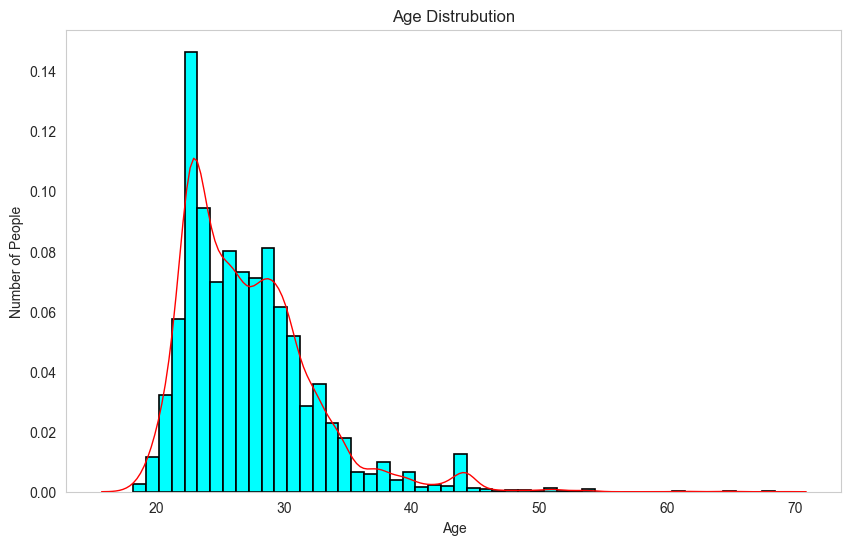

In [78]:
usefulcolumns.hist(column = 'age', bins = 50, figsize=(10, 6), color='cyan', edgecolor='black', linewidth=1.2, density=True)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distrubution')
sns.kdeplot(usefulcolumns[usefulcolumns['age'] > 0]['age'], color='red', linewidth=1, linestyle='-')
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1064024357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_edu['Education'][i]=str(round(no_edu['Education'][i]))


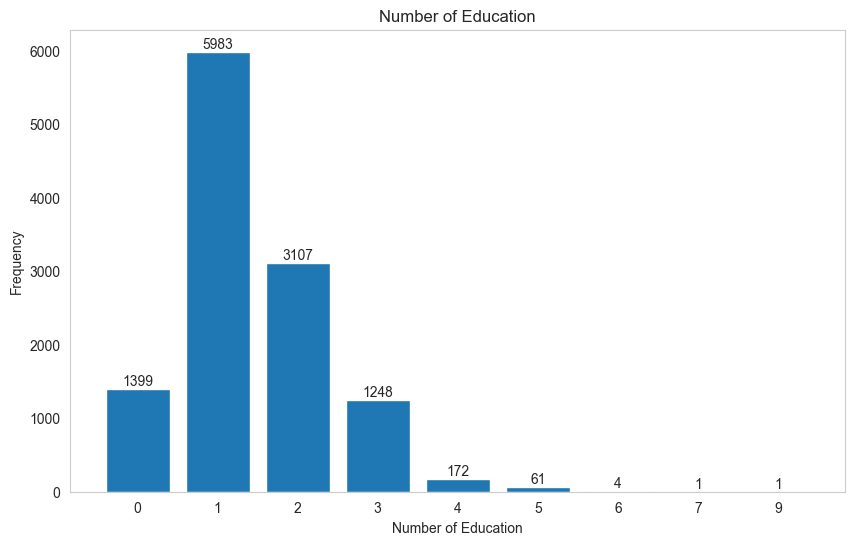

In [79]:
no_edu = usefulcolumns['no_edu'].value_counts().reset_index()
no_edu.columns = ['Education', 'Frequency']
no_edu = no_edu.sort_values(by=['Education'])
for i in range(len(no_edu['Education'])):
    no_edu['Education'][i]=str(round(no_edu['Education'][i]))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(no_edu['Education'], no_edu['Frequency'])
plt.xlabel('Number of Education')
plt.ylabel('Frequency')
plt.title('Number of Education')
for i, freq in enumerate(no_edu['Frequency']):
    ax.text(i, freq + 50, str(freq), ha='center')
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8560\880508152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_skill['skill'][i]=str(round(no_skill['skill'][i]))


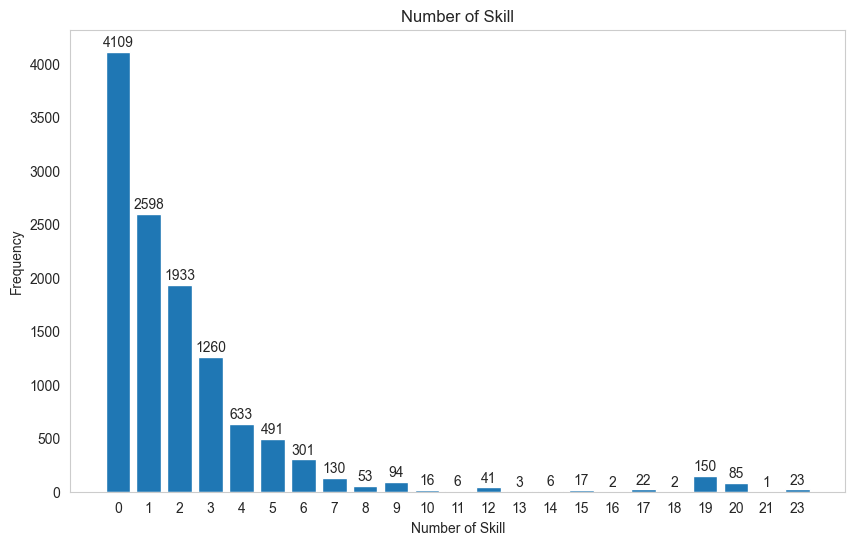

In [80]:
no_skill = usefulcolumns['no_skill'].value_counts().reset_index()
no_skill.columns = ['skill', 'Frequency']
no_skill = no_skill.sort_values(by=['skill'])
for i in range(len(no_skill['skill'])):
    no_skill['skill'][i]=str(round(no_skill['skill'][i]))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(no_skill['skill'], no_skill['Frequency'])
plt.xlabel('Number of Skill')
plt.ylabel('Frequency')
plt.title('Number of Skill')
for i, freq in enumerate(no_skill['Frequency']):
    ax.text(i, freq + 50, str(freq), ha='center')
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8560\2823175577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_experience['experience'][i]=str(round(no_experience['experience'][i]))


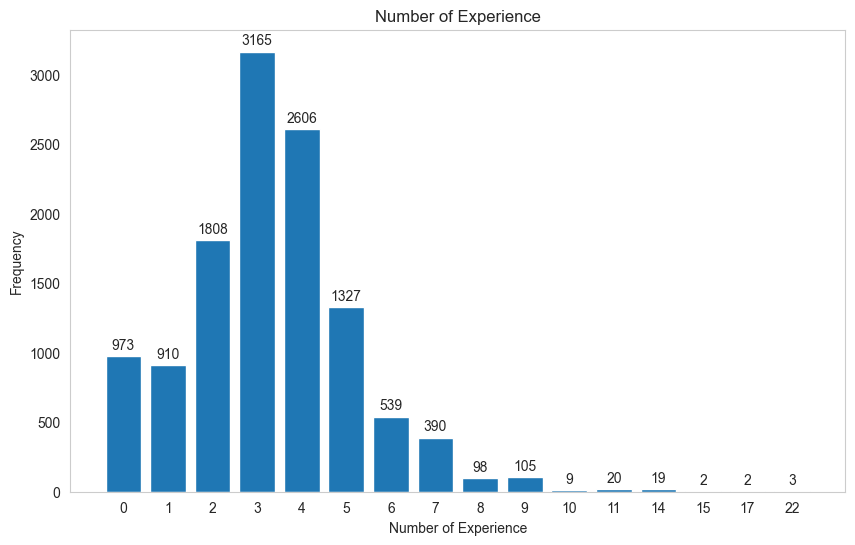

In [81]:
no_experience = usefulcolumns['no_experience'].value_counts().reset_index()
no_experience.columns = ['experience', 'Frequency']
no_experience = no_experience.sort_values(by=['experience'])
for i in range(len(no_experience['experience'])):
    no_experience['experience'][i]=str(round(no_experience['experience'][i]))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(no_experience['experience'], no_experience['Frequency'])
plt.xlabel('Number of Experience')
plt.ylabel('Frequency')
plt.title('Number of Experience')
for i, freq in enumerate(no_experience['Frequency']):
    ax.text(i, freq + 50, str(freq), ha='center')
plt.grid(False)
plt.show()

In [82]:
def get_total_experience_year(x):
    whole_exp = []
    length = len(x)
    for i in range(length):
        each_exp = [x[i]['startDate'], x[i]['endDate']]
        whole_exp.append(each_exp)
    return whole_exp
df['experience_detail'] = df['experience.experience'].apply(lambda x : get_total_experience_year(x))
def cal_no_year(x):
    total_duration = 0.0
    date_ranges = x
    try: 
        for date_range in date_ranges:
            start_date = datetime.strptime(date_range[0], '%B %Y')
            if date_range[1].lower() in ['ongoing', 'present']:
                end_date = datetime.now()
                if start_date > end_date:
                    duration = 0
                else:
                    duration = (end_date - start_date).days
                total_duration += duration
            else:
                end_date = datetime.strptime(date_range[1], '%B %Y')
                if start_date > end_date:
                    duration = 0
                else:
                    duration = (end_date - start_date).days
                total_duration += duration
        return total_duration/365
    except:
        return 'Error'
usefulcolumns['no_exp_year'] = df['experience_detail'].apply(lambda x : cal_no_year(x))

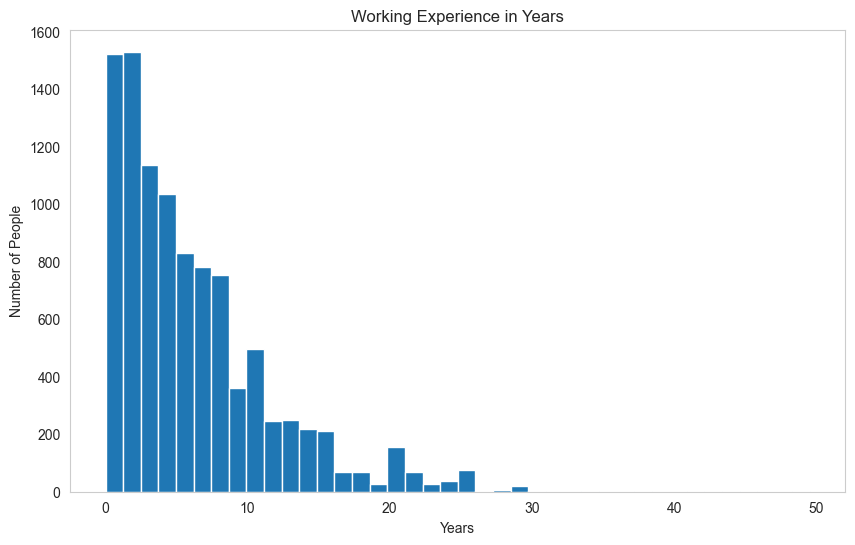

In [83]:
usefulcolumns[usefulcolumns['no_exp_year']!='Error']['no_exp_year'].hist(bins=40, figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Number of People')
plt.title('Working Experience in Years')
plt.grid(False)
plt.show()

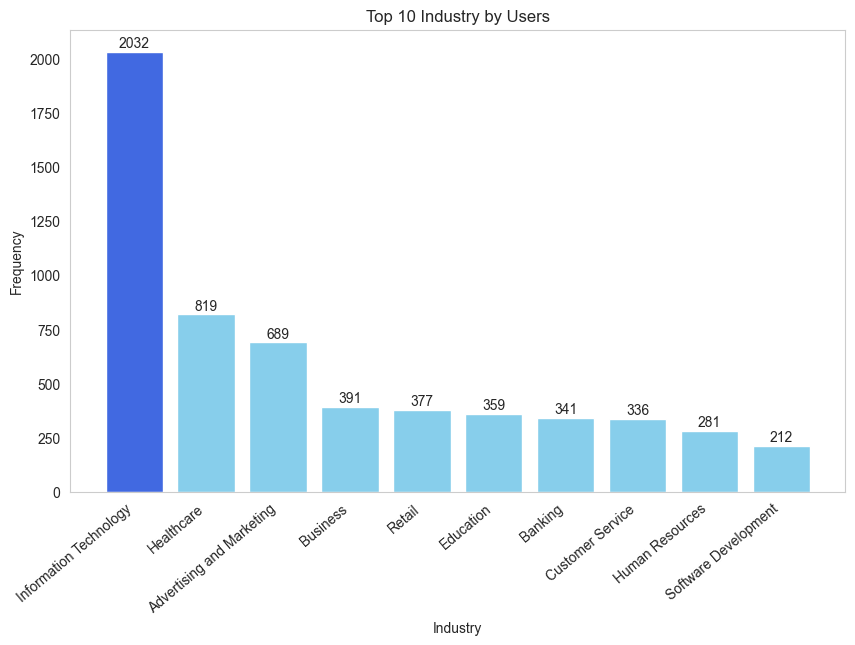

In [88]:
industry = usefulcolumns['industry'].value_counts().reset_index()
industry.columns = ['industry', 'Frequency']
industry = industry.sort_values(by=['Frequency'], ascending= False)[:10]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(industry['industry'], industry['Frequency'], color=['royalblue' if i < 1 else 'skyblue' for i in range(len(industry))])
ax.set_xlabel('Industry')
ax.set_ylabel('Frequency')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Top 10 Industry by Users')
plt.grid(False)
for i, freq in enumerate(industry['Frequency']):
    ax.text(i, freq + 20, str(freq), ha='center')
plt.show()

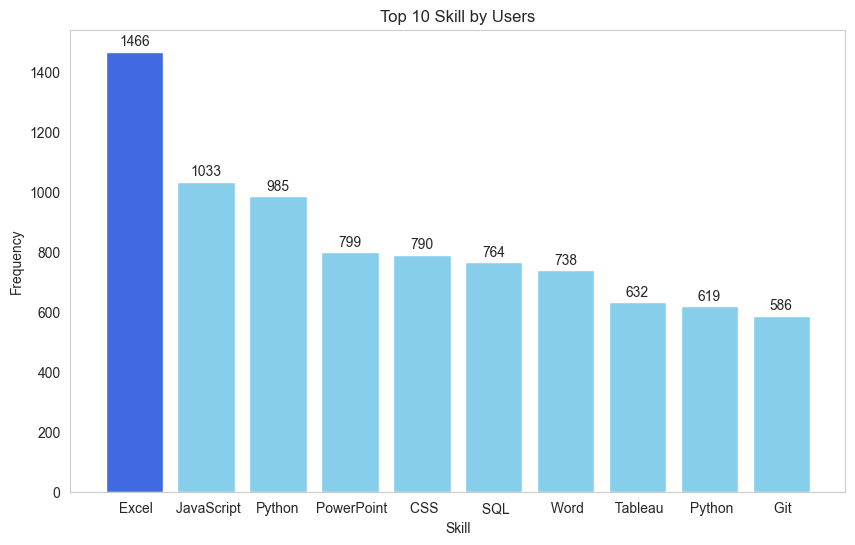

In [89]:
from collections import Counter
skill_frequency = Counter()
for row in usefulcolumns['skill_list']:
    skill_frequency.update(row)
frequency_skill = pd.DataFrame.from_dict(skill_frequency, orient='index', columns=['Frequency'])
frequency_skill.index.name = 'Skill'
frequency_skill = frequency_skill.sort_values(by='Frequency', ascending=False)
frequency_skill.reset_index(inplace=True)
Top10_frequency_skill = frequency_skill[1:][:10]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(Top10_frequency_skill['Skill'], Top10_frequency_skill['Frequency'], color=['royalblue' if i < 1 else 'skyblue' for i in range(len(Top10_frequency_skill))])
ax.set_xlabel('Skill')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Skill by Users')
plt.grid(False)
for i, freq in enumerate(Top10_frequency_skill['Frequency']):
    ax.text(i, freq + 20, str(freq), ha='center')
plt.show()

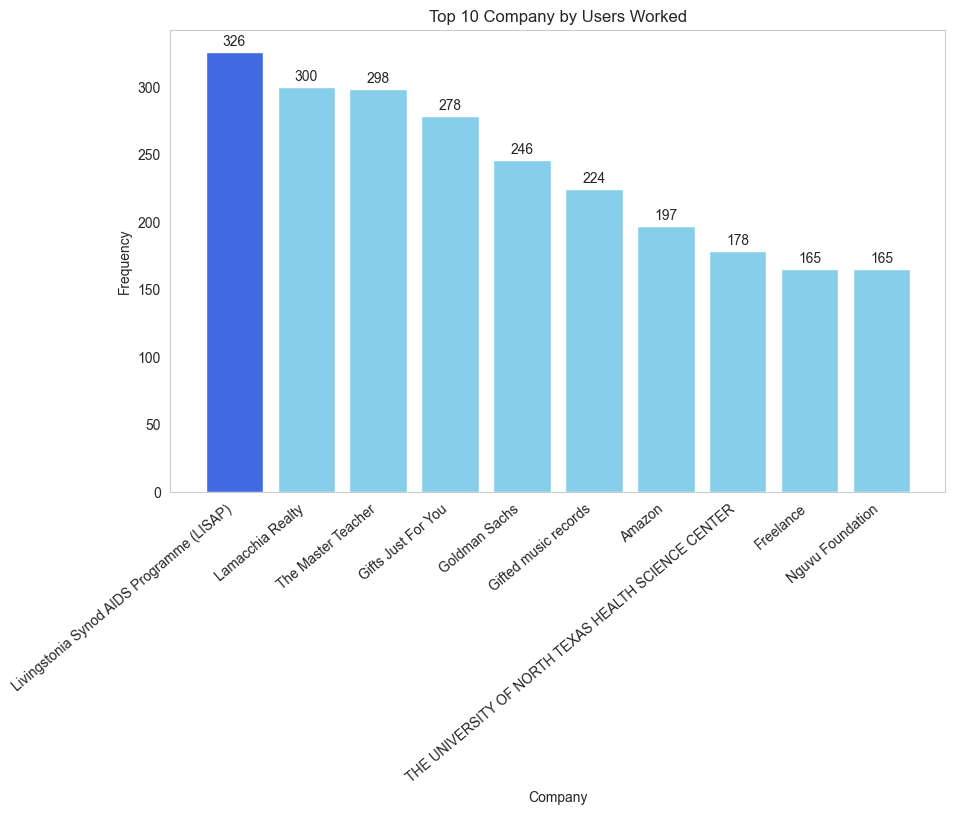

In [90]:
company_frequency = Counter()
for row in usefulcolumns['company_list']:
    company_frequency.update(row)
frequency_company = pd.DataFrame.from_dict(company_frequency, orient='index', columns=['Frequency'])
frequency_company.index.name = 'company'
frequency_company = frequency_company.sort_values(by='Frequency', ascending=False)
frequency_company.reset_index(inplace=True)
Top10_frequency_company = frequency_company[1:][:10]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(Top10_frequency_company['company'], Top10_frequency_company['Frequency'], color=['royalblue' if i < 1 else 'skyblue' for i in range(len(Top10_frequency_company))])
ax.set_xlabel('Company')
ax.set_ylabel('Frequency')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Top 10 Company by Users Worked')
plt.grid(False)
for i, freq in enumerate(Top10_frequency_company['Frequency']):
    ax.text(i, freq + 5, str(freq), ha='center')
plt.show()

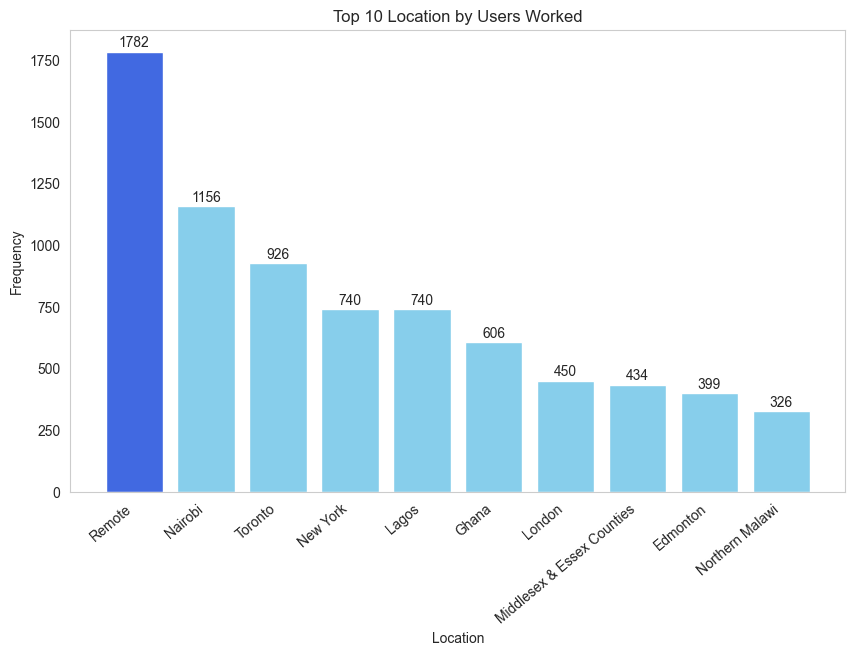

In [91]:
location_frequency = Counter()
for row in usefulcolumns['location']:
    location_frequency.update(row)
frequency_location = pd.DataFrame.from_dict(location_frequency, orient='index', columns=['Frequency'])
frequency_location.index.name = 'location'
frequency_location = frequency_location.sort_values(by='Frequency', ascending=False)
frequency_location.reset_index(inplace=True)
Top10_frequency_location = frequency_location[1:][:10]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(Top10_frequency_location['location'], Top10_frequency_location['Frequency'], color=['royalblue' if i < 1 else 'skyblue' for i in range(len(Top10_frequency_location))])
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Top 10 Location by Users Worked')
plt.grid(False)
for i, freq in enumerate(Top10_frequency_location['Frequency']):
    ax.text(i, freq + 20, str(freq), ha='center')
plt.show()

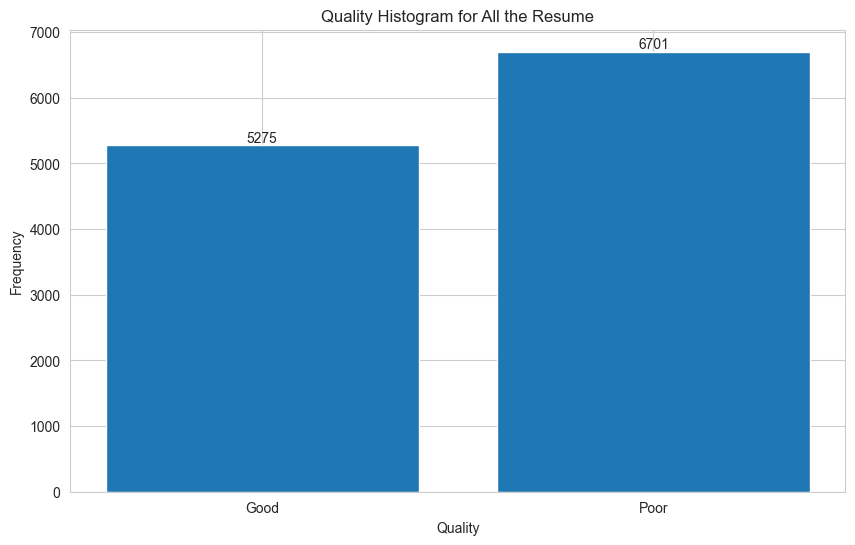

In [93]:
quality = usefulcolumns['resume_quality'].value_counts().reset_index()
quality.columns = ['Quality', 'Frequency']
quality['Quality'] = pd.Categorical(quality['Quality'], categories=['Excellent', 'Good', 'Poor'], ordered=True)
quality = quality.sort_values('Quality')
quality

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(quality['Quality'], quality['Frequency'])
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
ax.set_title('Quality Histogram for All the Resume')
for i, freq in enumerate(quality['Frequency']):
    ax.text(i, freq + 50, str(freq), ha='center')
plt.show()

Top 3 Industries Resume Quanlity

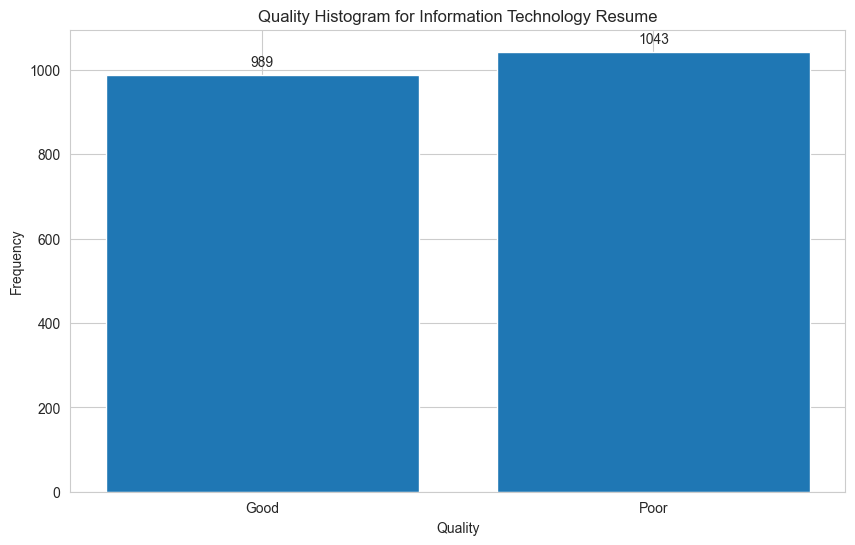

In [94]:
technology = usefulcolumns[usefulcolumns['industry'] == 'Information Technology']
quality = technology['resume_quality'].value_counts().reset_index()
quality.columns = ['Quality', 'Frequency']
quality['Quality'] = pd.Categorical(quality['Quality'], categories=['Excellent', 'Good', 'Poor'], ordered=True)
quality = quality.sort_values('Quality')
quality

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(quality['Quality'], quality['Frequency'])
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
ax.set_title('Quality Histogram for Information Technology Resume')
for i, freq in enumerate(quality['Frequency']):
    ax.text(i, freq + 20, str(freq), ha='center')
plt.show()

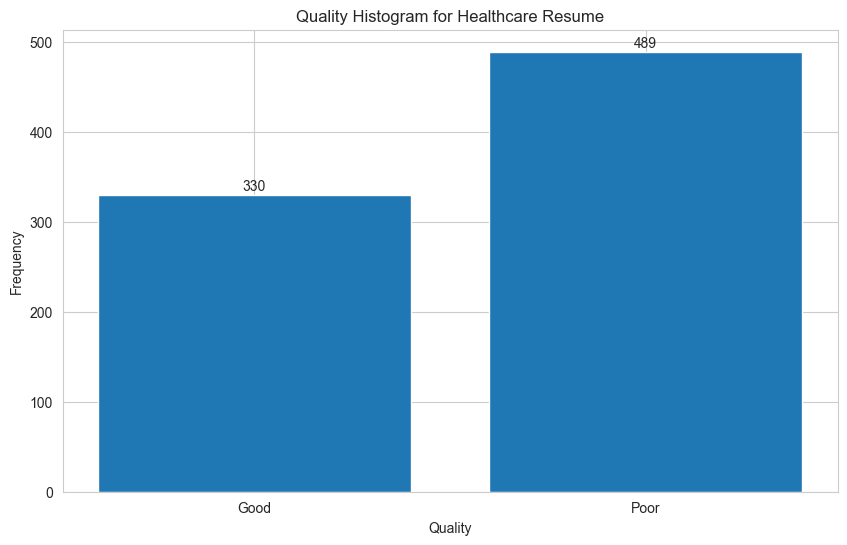

In [95]:
healthcare = usefulcolumns[usefulcolumns['industry'] == 'Healthcare']
quality = healthcare['resume_quality'].value_counts().reset_index()
quality.columns = ['Quality', 'Frequency']
quality['Quality'] = pd.Categorical(quality['Quality'], categories=['Excellent', 'Good', 'Poor'], ordered=True)
quality = quality.sort_values('Quality')
quality

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(quality['Quality'], quality['Frequency'])
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
ax.set_title('Quality Histogram for Healthcare Resume')
for i, freq in enumerate(quality['Frequency']):
    ax.text(i, freq + 5, str(freq), ha='center')
plt.show()

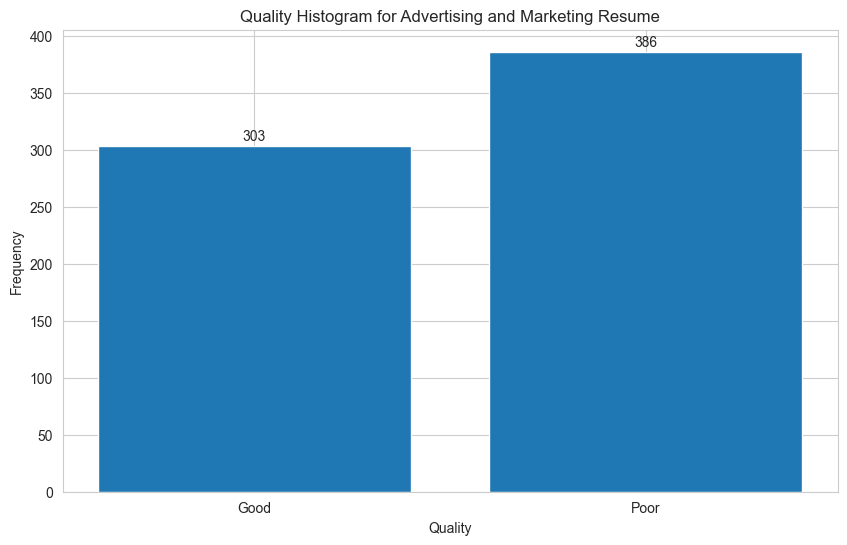

In [96]:
ad_and_market = usefulcolumns[usefulcolumns['industry'] == 'Advertising and Marketing']
quality = ad_and_market['resume_quality'].value_counts().reset_index()
quality.columns = ['Quality', 'Frequency']
quality['Quality'] = pd.Categorical(quality['Quality'], categories=['Excellent', 'Good', 'Poor'], ordered=True)
quality = quality.sort_values('Quality')
quality

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(quality['Quality'], quality['Frequency'])
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
ax.set_title('Quality Histogram for Advertising and Marketing Resume')
for i, freq in enumerate(quality['Frequency']):
    ax.text(i, freq + 5, str(freq), ha='center')
plt.show()

In [97]:
qq = usefulcolumns[['important_section', 'resume_length', 'action_verb', 'no_use_pronoun', 'bullet_point', 'spelling']]
qq.head()

,important_section,resume_length,action_verb,no_use_pronoun,bullet_point,spelling
0,Excellent,Good,Excellent,Good,Poor,Poor
1,Excellent,Poor,Excellent,Good,Poor,Poor
2,Excellent,Good,Excellent,Excellent,Poor,Poor
3,Excellent,Good,Good,Good,Poor,Poor
4,Excellent,Good,Good,Good,Poor,Poor
